In [1]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
from sklearn.svm import LinearSVC
%matplotlib inline

# Read & Visualize dataset

In [2]:
def get_dataset(path):
    images = []
    for subdir, dirs, files in os.walk(path):
        for file in files:
            if '.DS_Store' not in file:
                images.append(os.path.join(subdir, file))
                
    return list(map(lambda img: cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB), images))

Num of vehicles =  8792
Num of non-vehicles =  8968


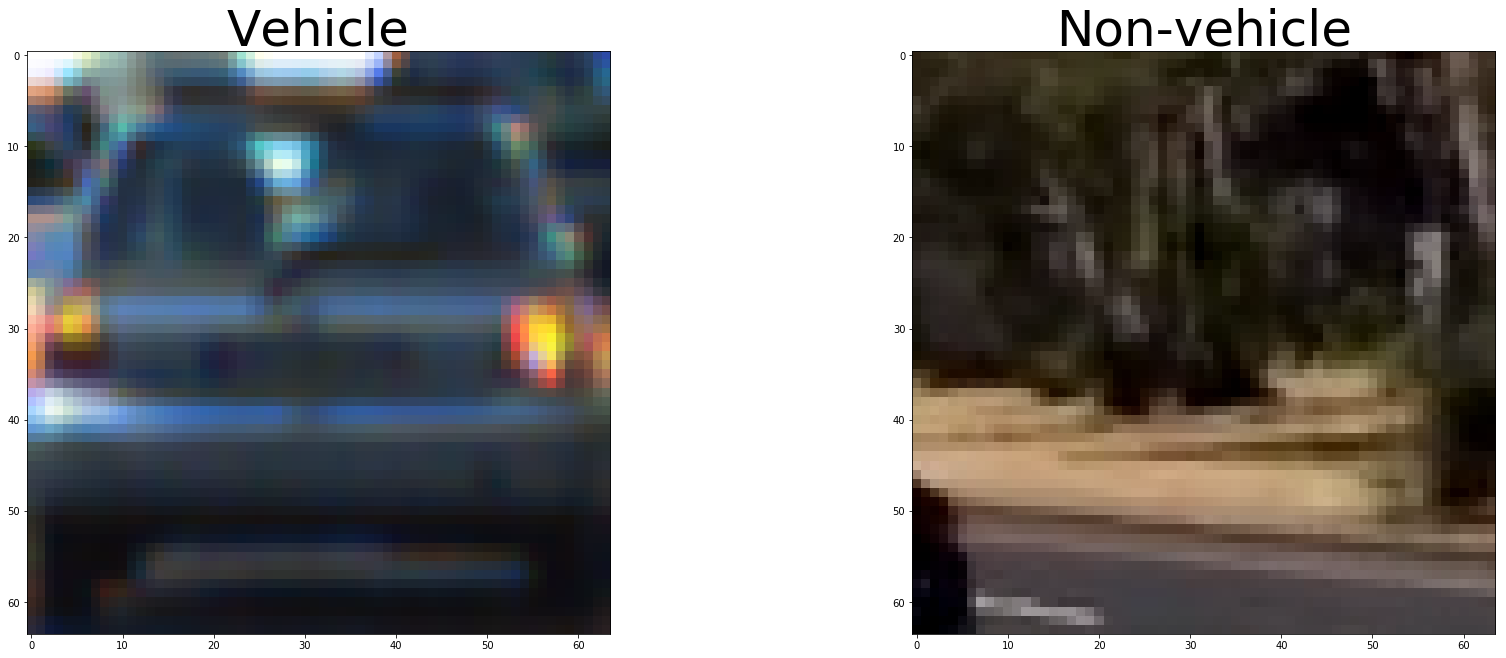

In [4]:
vehicle_dataset_path = './dataset/vehicles'
vehicles = get_dataset(vehicle_dataset_path)
non_vehicle_dataset_path = './dataset/non-vehicles'
non_vehicles = get_dataset(non_vehicle_dataset_path)
print("Num of vehicles = ", len(vehicles))
print("Num of non-vehicles = ", len(non_vehicles))

vehicle_sample = random.choice(vehicles)
non_vehicle_sample = random.choice(non_vehicles)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(vehicle_sample)
ax1.set_title("Vehicle", fontsize=50)
ax2.imshow(non_vehicle_sample)
ax2.set_title("Non-vehicle", fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Feature extraction

In [5]:
# define parameters for later use
params = {
            'color_space': 'YCrCb',
            'spatial_size': (16, 16),
            'orient': 8,
            'pix_per_cell': 8,
            'cell_per_block': 2,
            'hog_channel': 'ALL',
            'hist_bins': 32,
            'scale': 1.5,
            'spatial_feat': True, 
            'hist_feat': True, 
            'hog_feat': True
}

In [6]:
# extract features for a given image based on given params
def extract_features(img, params):
        file_features = []
        # convert to defined color space
        feature_image = convert_image(img, params.color_space)    

        # extract spatial features
        if params.spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=params.spatial_size)
            file_features.append(spatial_features)
        if params.hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=params.hist_bins)
            file_features.append(hist_features)
        if params.hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if params.hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        params.orient, params.pix_per_cell, params.cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,params.hog_channel], params.orient, 
                            params.pix_per_cell, params.cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
            
        # Return list of feature vectors
        return np.concatenate(file_features)

{'hist_feat': True, 'spatial_size': (16, 16), 'cell_per_block': 2, 'hog_channel': 'ALL', 'color_space': 'YCrCb', 'hog_feat': True, 'spatial_feat': True, 'scale': 1.5, 'pix_per_cell': 8, 'orient': 8, 'hist_bins': 32}
